In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from preprocessingFunction import *

from preprocessingFunction import  LabelEncoder
# from preproceesingfunctioon import StandardScaler
# from preproceesingfunctioon import MinMaxScaler
# from preproceesingfunctioon import RobustScaler


In [2]:
train=pd.read_csv("HousePrices/train.csv")
test=pd.read_csv("Houseprices/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.drop(['Id'],axis=1,inplace=True)

In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
nullcols=[feature for feature in train.columns if train[feature].isnull().sum()>0]
nullcols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [10]:
trainNullPer=train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()

In [11]:
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercemtage']

In [12]:
trainNullDF

,NullValues,NullPercemtage
MSSubClass,0.0,0.00
MSZoning,0.0,0.00
LotFrontage,259.0,17.74
LotArea,0.0,0.00
Street,0.0,0.00
...,...,...
MoSold,0.0,0.00
YrSold,0.0,0.00
SaleType,0.0,0.00
SaleCondition,0.0,0.00


In [13]:
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)

In [14]:
trainNullDF

,NullValues,NullPercemtage
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
...,...,...
Heating,0.0,0.00
HeatingQC,0.0,0.00
MSZoning,0.0,0.00
1stFlrSF,0.0,0.00


In [15]:
trainNullDF.reset_index(inplace=True)

In [16]:
trainNullDF.head(10)

,index,NullValues,NullPercemtage
0,PoolQC,1453.0,99.52
1,MiscFeature,1406.0,96.30
2,Alley,1369.0,93.77
3,Fence,1179.0,80.75
4,FireplaceQu,690.0,47.26
5,LotFrontage,259.0,17.74
6,GarageYrBlt,81.0,5.55
7,GarageCond,81.0,5.55
8,GarageType,81.0,5.55
9,GarageFinish,81.0,5.55


In [17]:
#drpoing the columns with more than 50% of null values
train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)


In [18]:
trainNullPer=train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercemtage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NullValues,NullPercemtage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [19]:
trainNullDF.head(20)

,index,NullValues,NullPercemtage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [20]:
trainNullDF[:14]

,index,NullValues,NullPercemtage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [21]:
trainNullDF[:14]["index"]

0      LotFrontage
1       GarageType
2      GarageYrBlt
3     GarageFinish
4       GarageQual
5       GarageCond
6     BsmtFinType2
7     BsmtExposure
8         BsmtQual
9         BsmtCond
10    BsmtFinType1
11      MasVnrArea
12      MasVnrType
13      Electrical
Name: index, dtype: object

In [22]:
nullcolumns=np.array(trainNullDF[:14]["index"])
nullcolumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [24]:
for column in nullcolumns:
    if train[column].dtype=="object":
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f"{column}this is numerical")
        train[column].fillna(train[column].median(),inplace=True)
    

LotFrontagethis is numerical
GarageType
GarageYrBltthis is numerical
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrAreathis is numerical
MasVnrType
Electrical


In [25]:
trainNullPer=train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercemtage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NullValues,NullPercemtage
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [27]:
train.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [28]:
numericalColumns= train.select_dtypes(include=np.number).columns
numericalColumns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
objectColumns= train.select_dtypes(include=np.object).columns
objectColumns

C:\Users\DELL\AppData\Local\Temp/ipykernel_10496/127294562.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  objectColumns= train.select_dtypes(include=np.object).columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

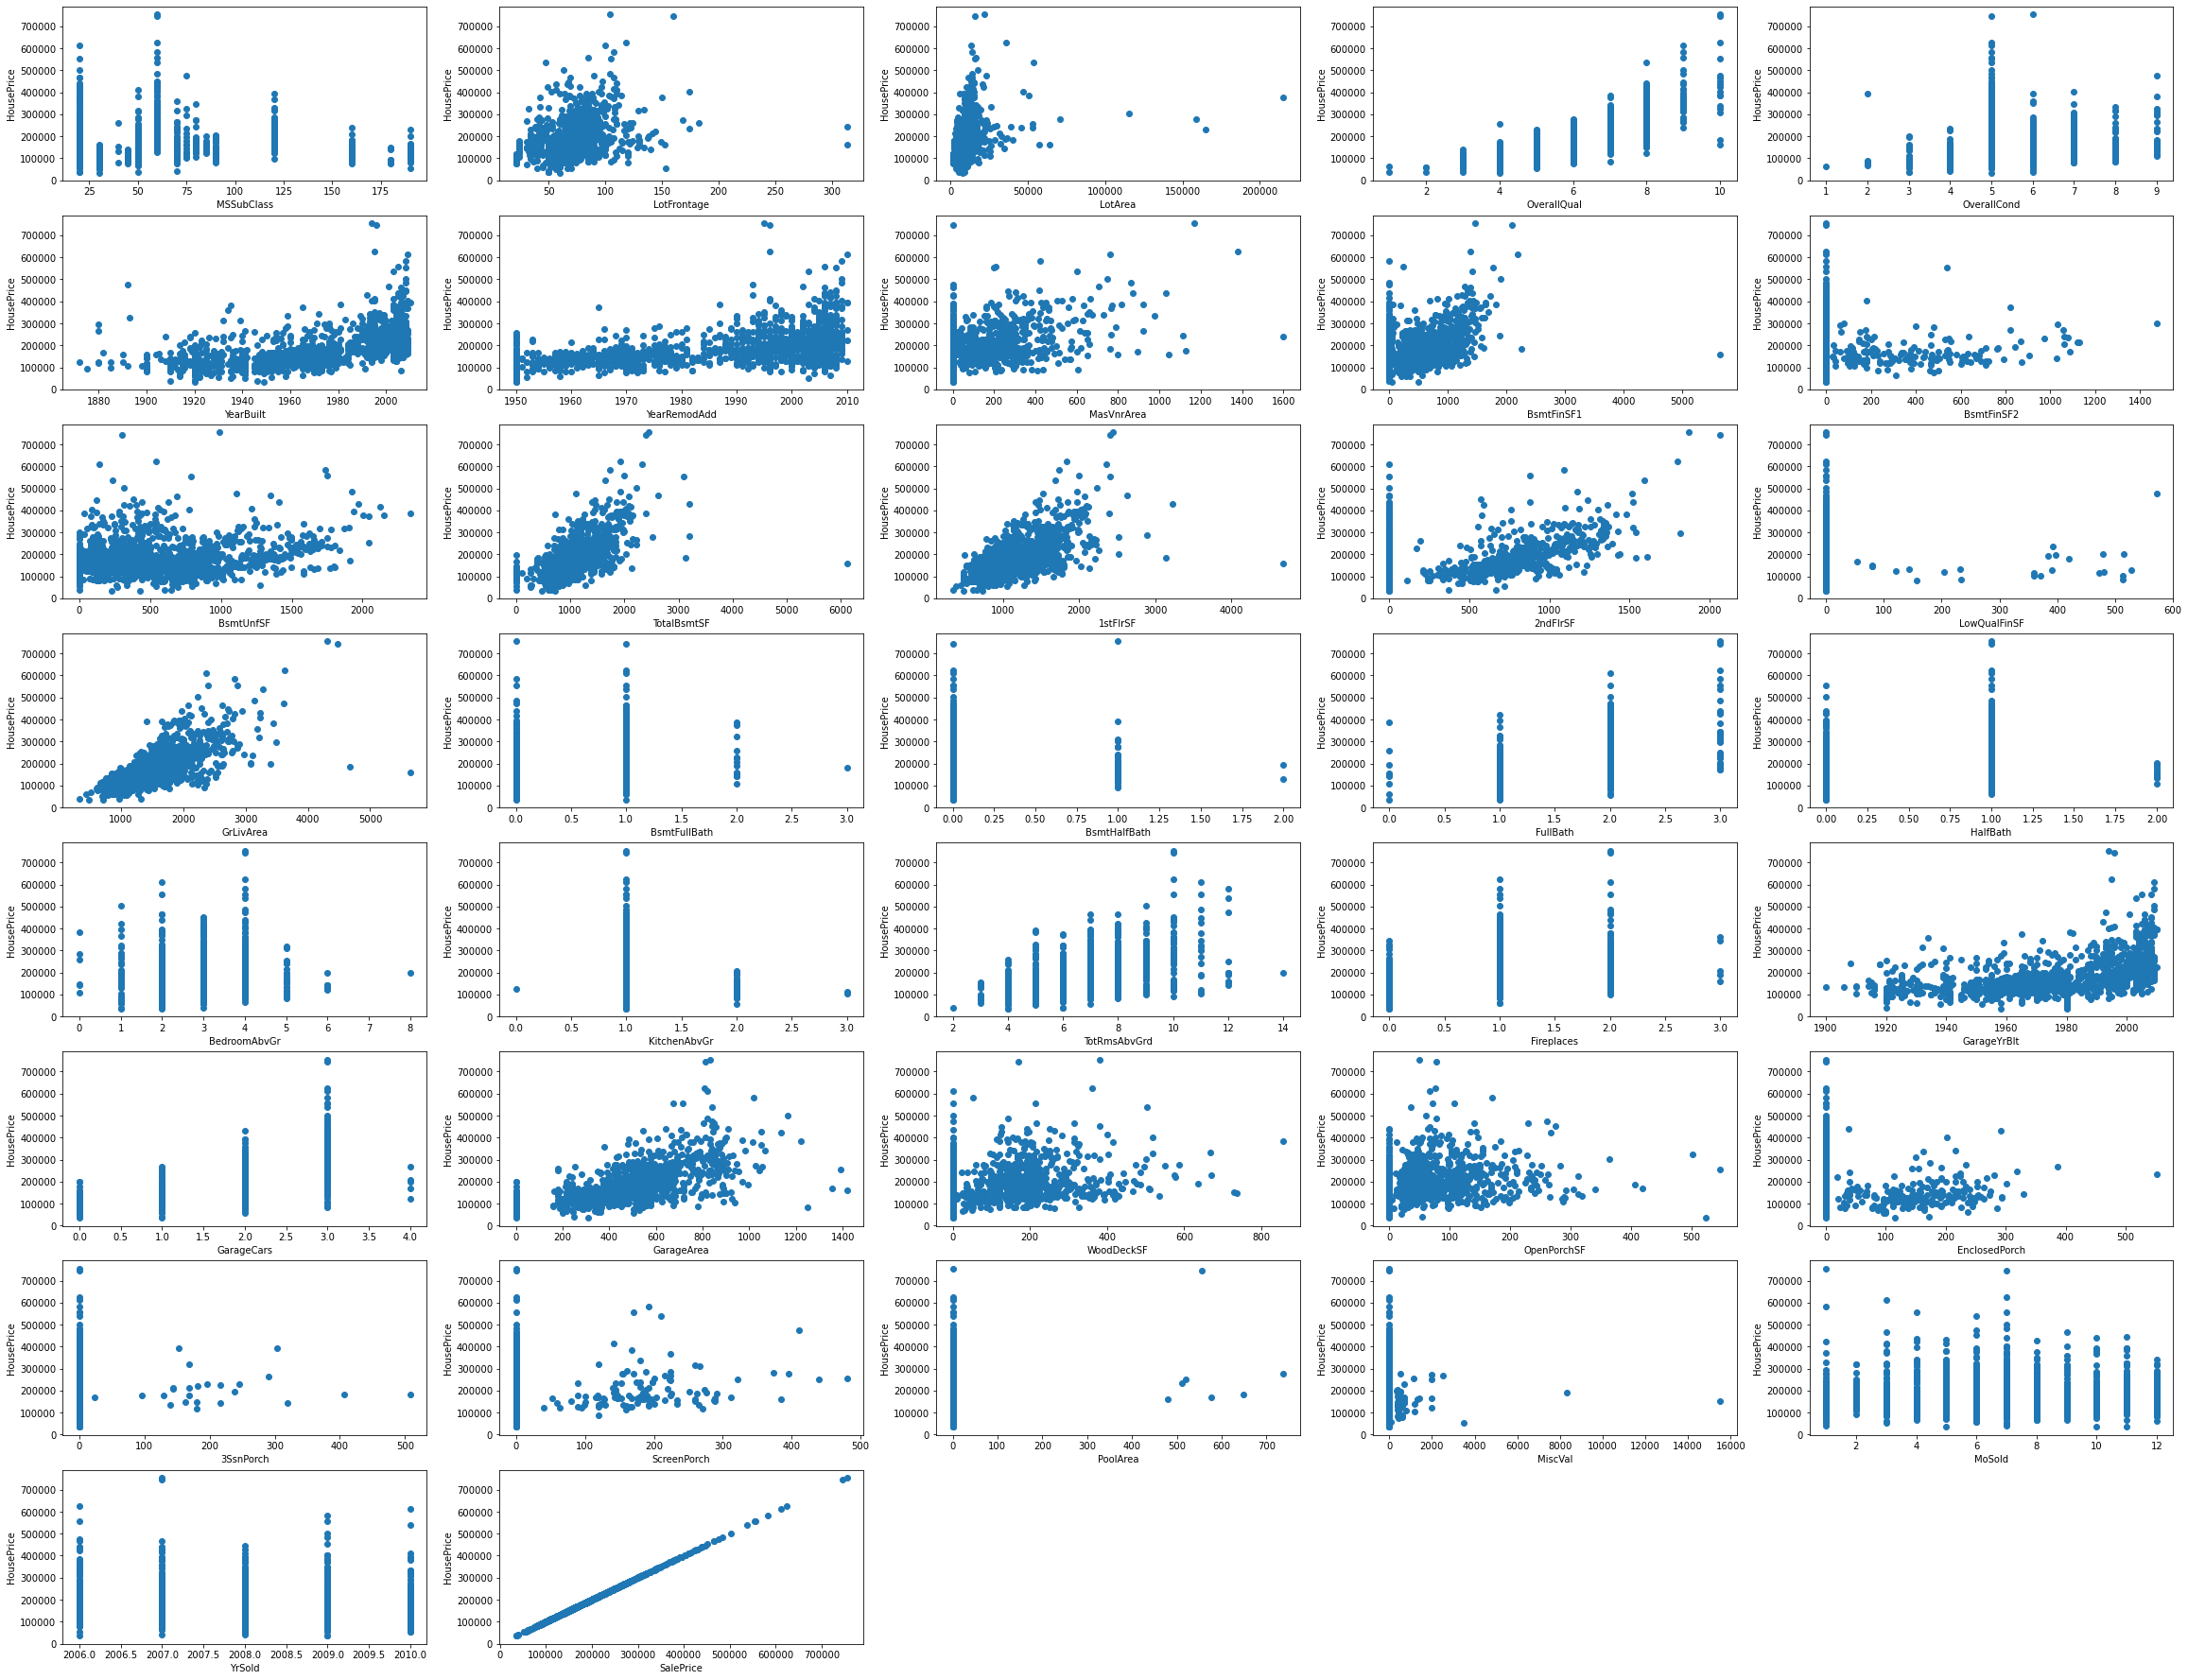

In [30]:
j=0
plt.figure(figsize=(40,40))
for column in numericalColumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [31]:
train["MSSubClass"].nunique()

15

In [32]:
train["LotFrontage"].nunique()

110

In [33]:
descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if train[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [34]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [35]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

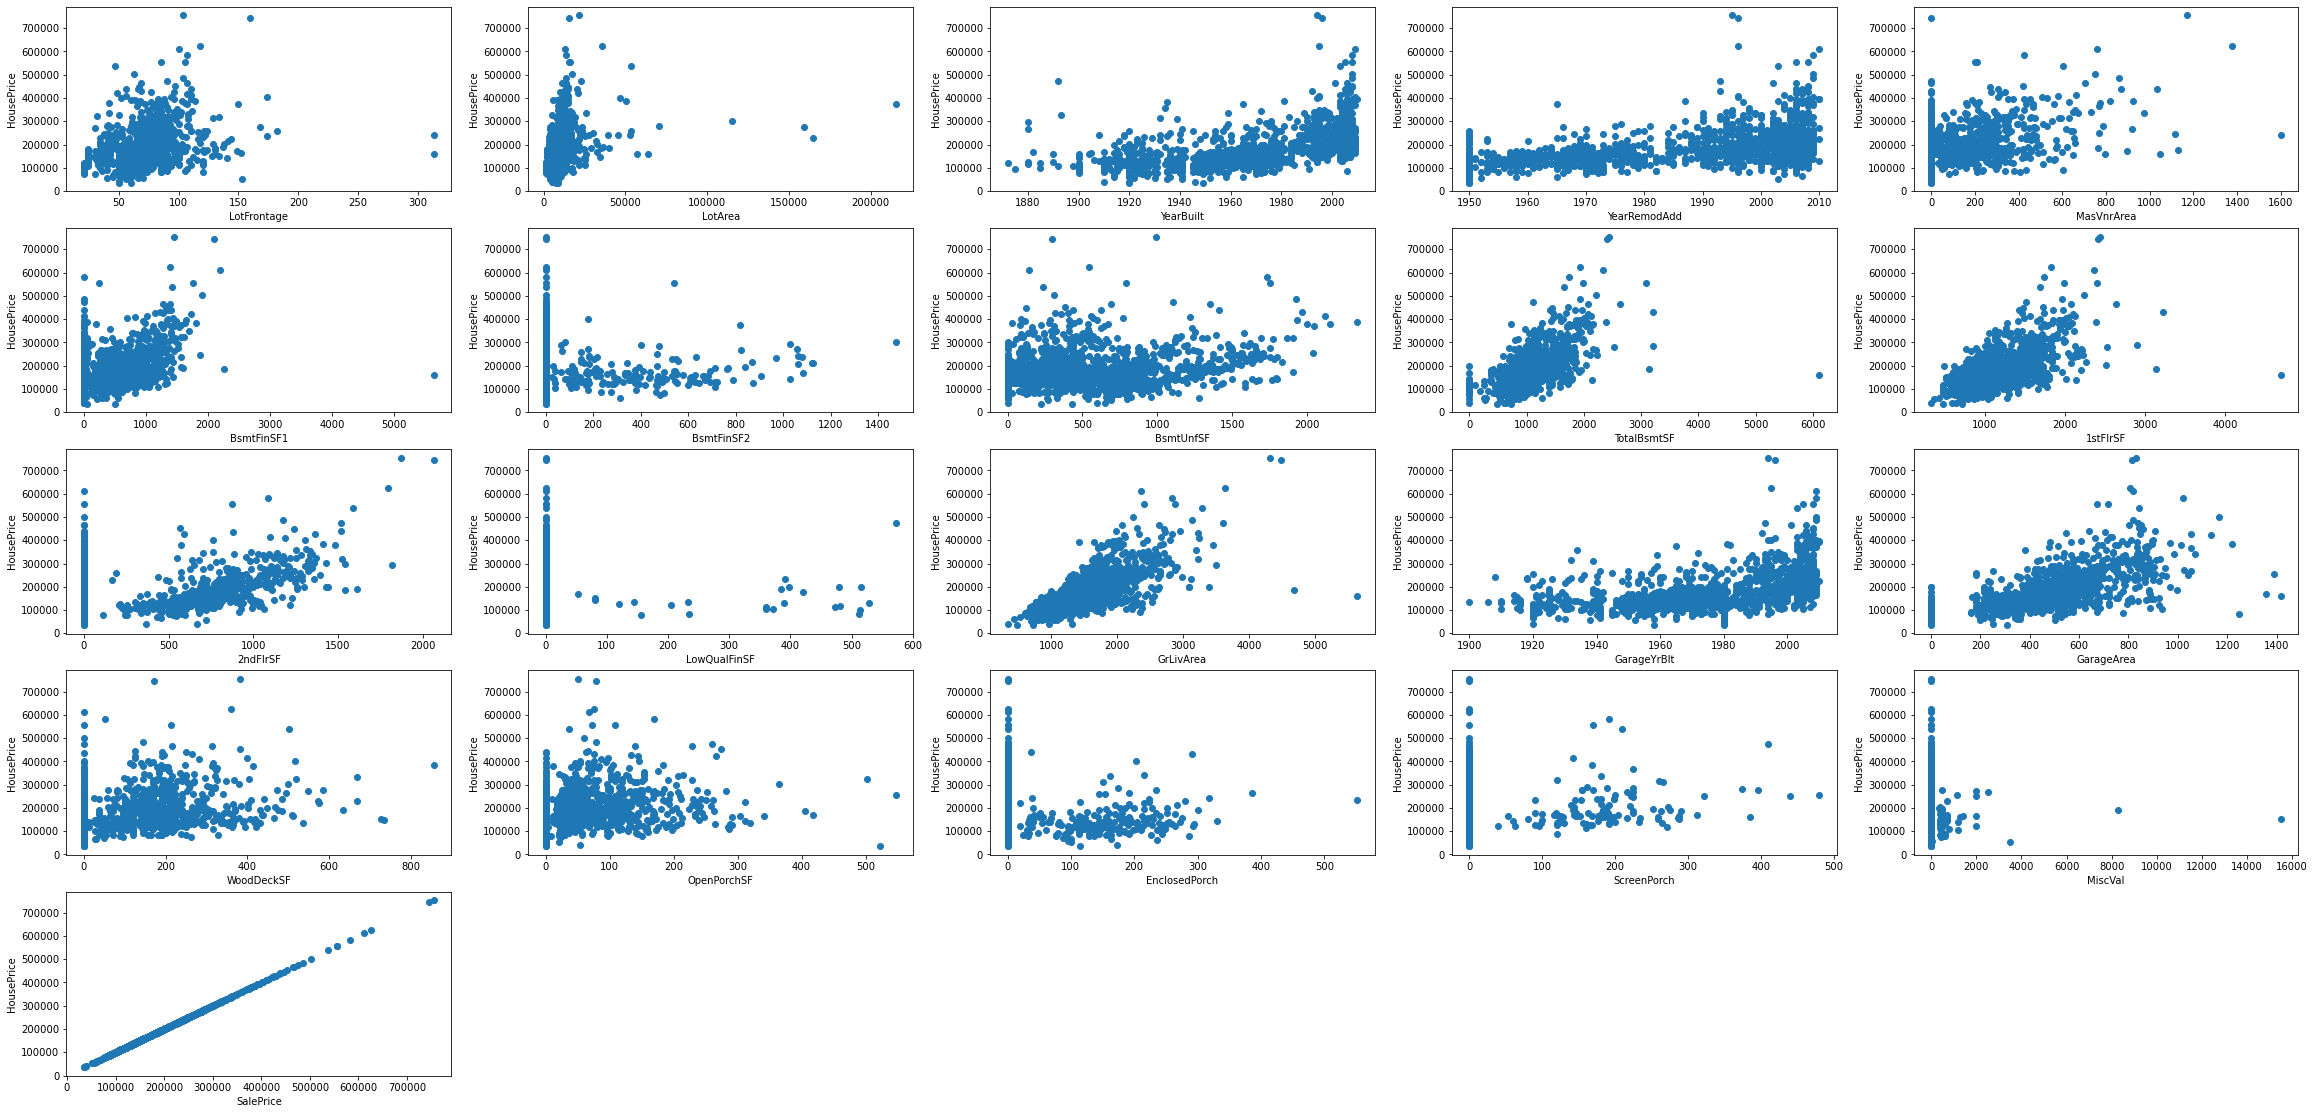

In [36]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [37]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [38]:
observationVal=train.groupby('OverallQual')['SalePrice'].mean()
observationVal
observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
observationValDF.reset_index(inplace=True)
observationValDF

,OverallQual,SalePrice
0,10,438588.388889
1,9,367513.023256
2,8,274735.535714
3,7,207716.423197
4,6,161603.034759
5,5,133523.347607
6,4,108420.655172
7,3,87473.750000
8,2,51770.333333
9,1,50150.000000


<BarContainer object of 10 artists>

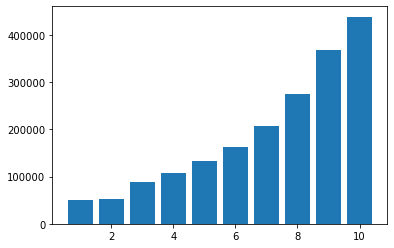

In [39]:
plt.bar(observationValDF['OverallQual'],observationValDF['SalePrice'])

In [40]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


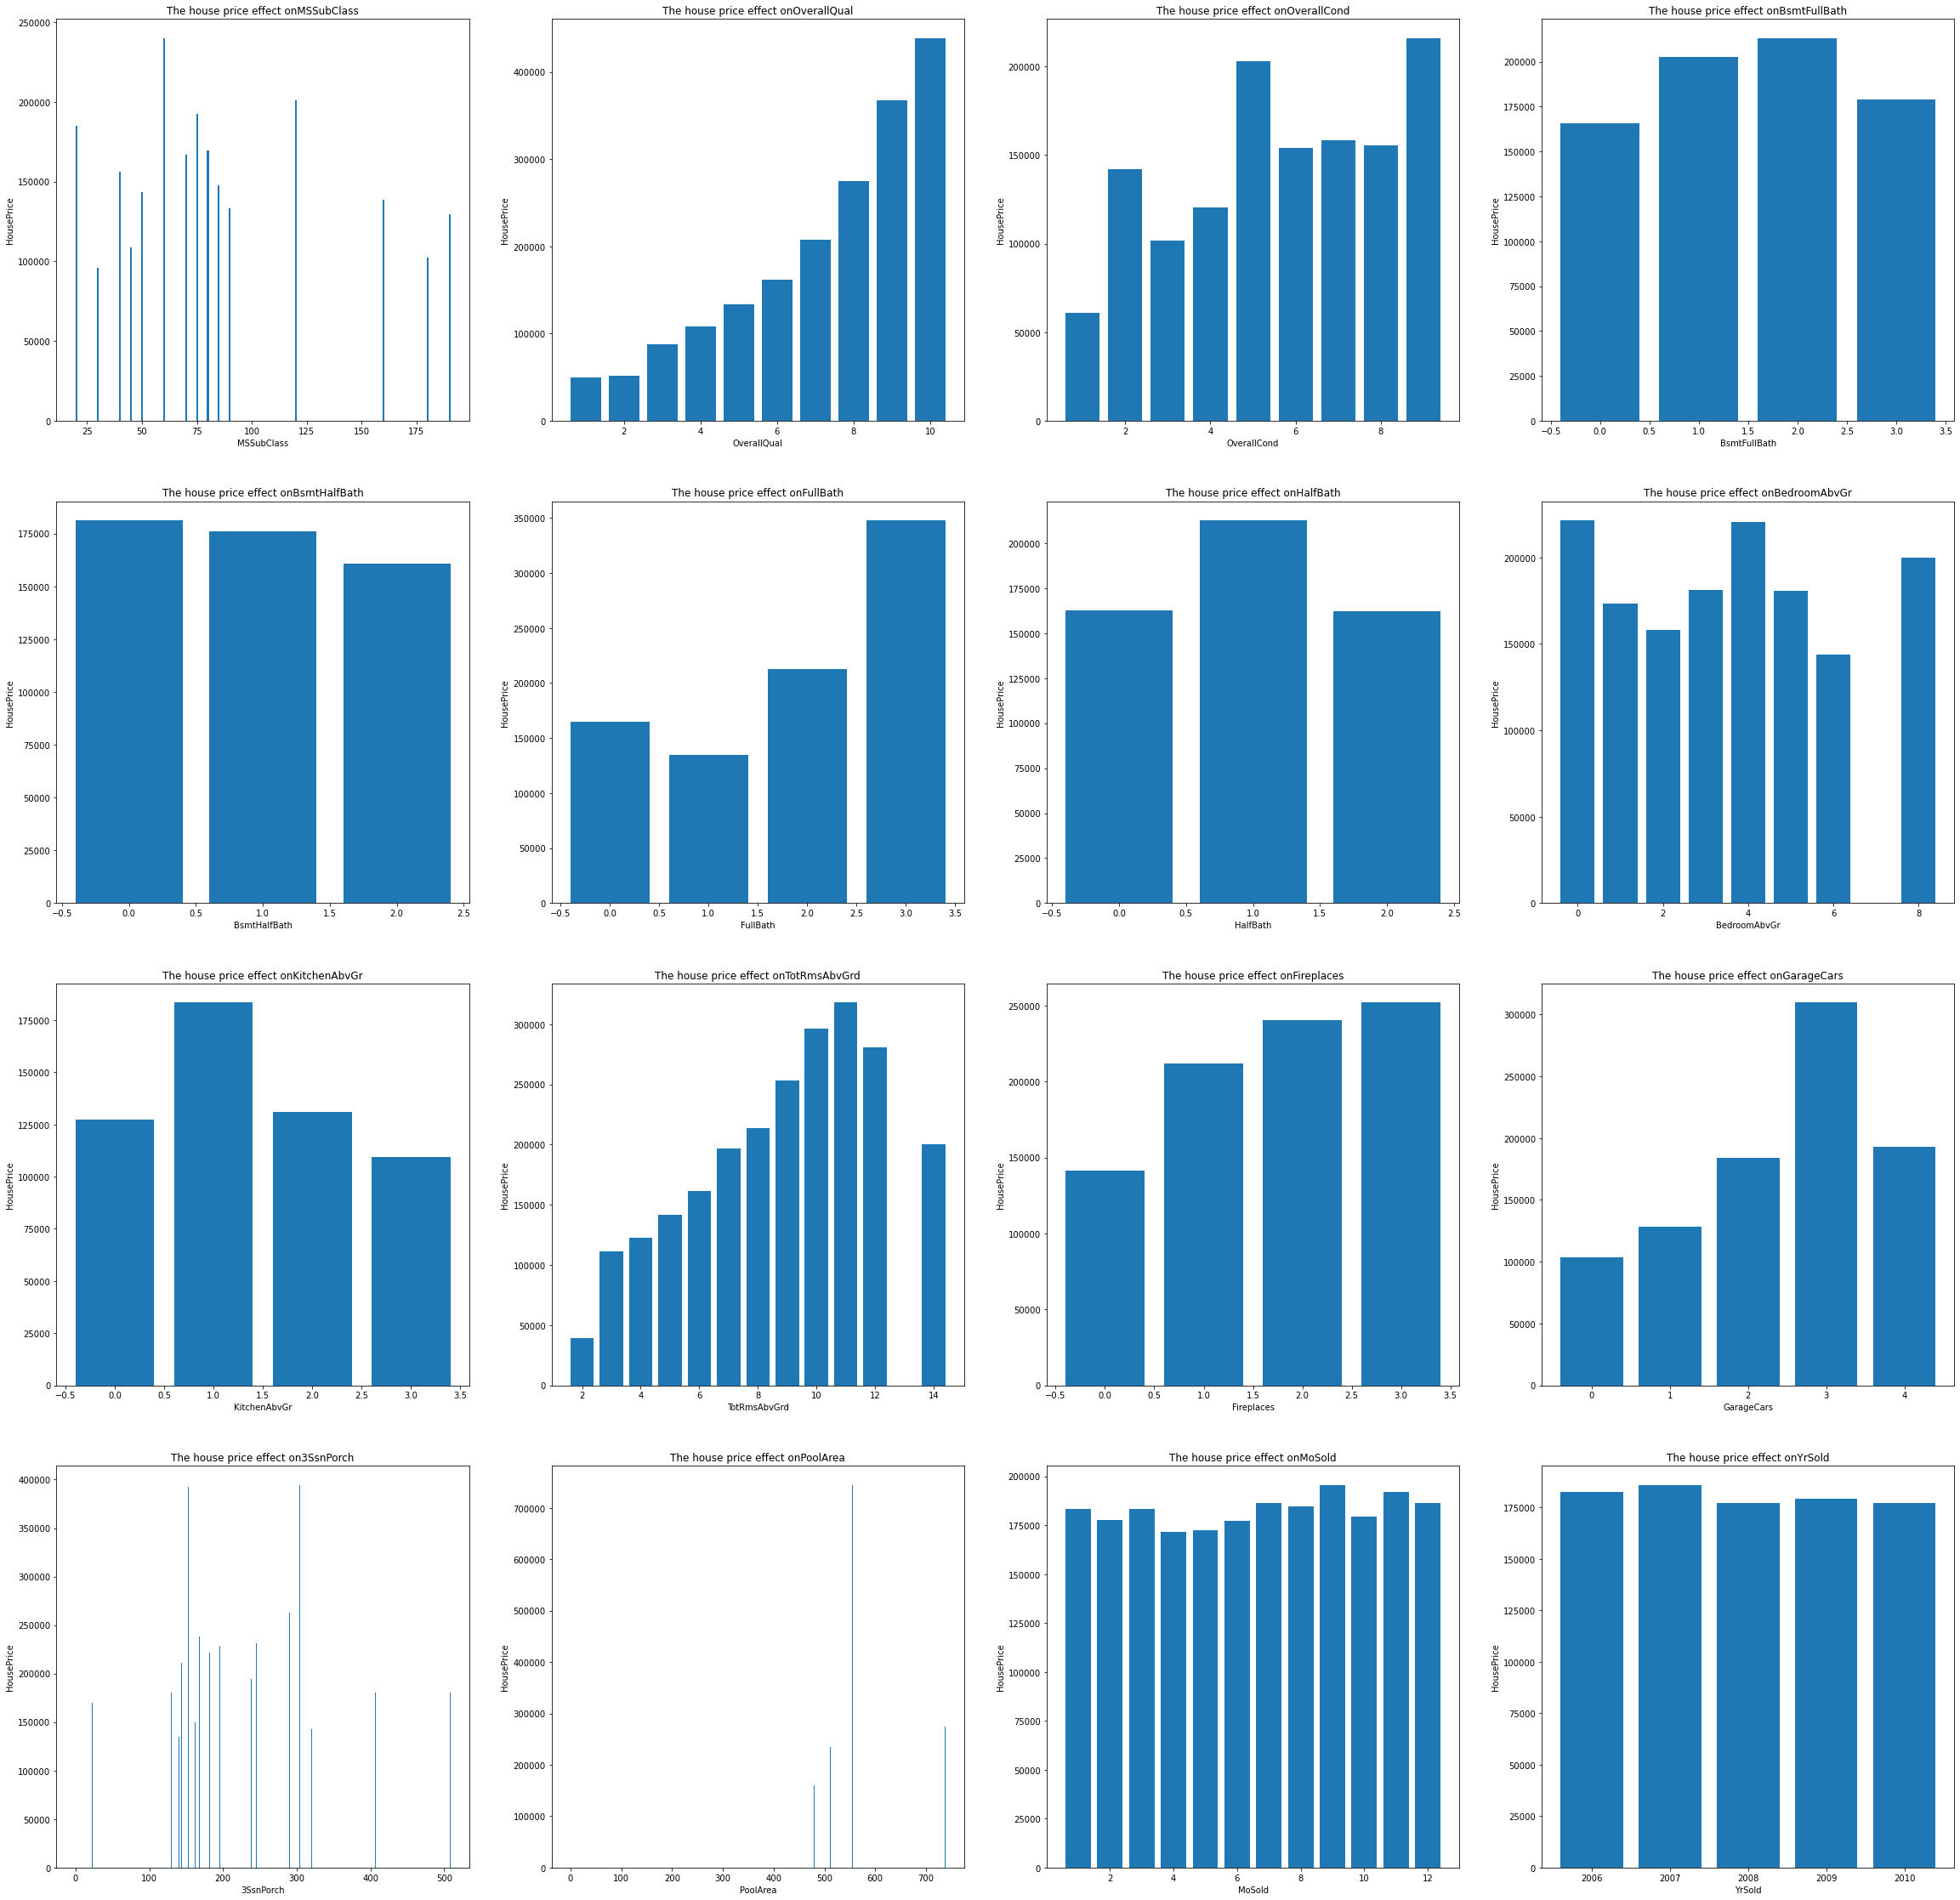

In [41]:
j=0
plt.figure(figsize=(40,40))
for column in descriateCols:
    plt.subplot(4,4,j+1)
    observationVal=train.groupby(column)['SalePrice'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
    observationValDF.reset_index(inplace=True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"The house price effect on{column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

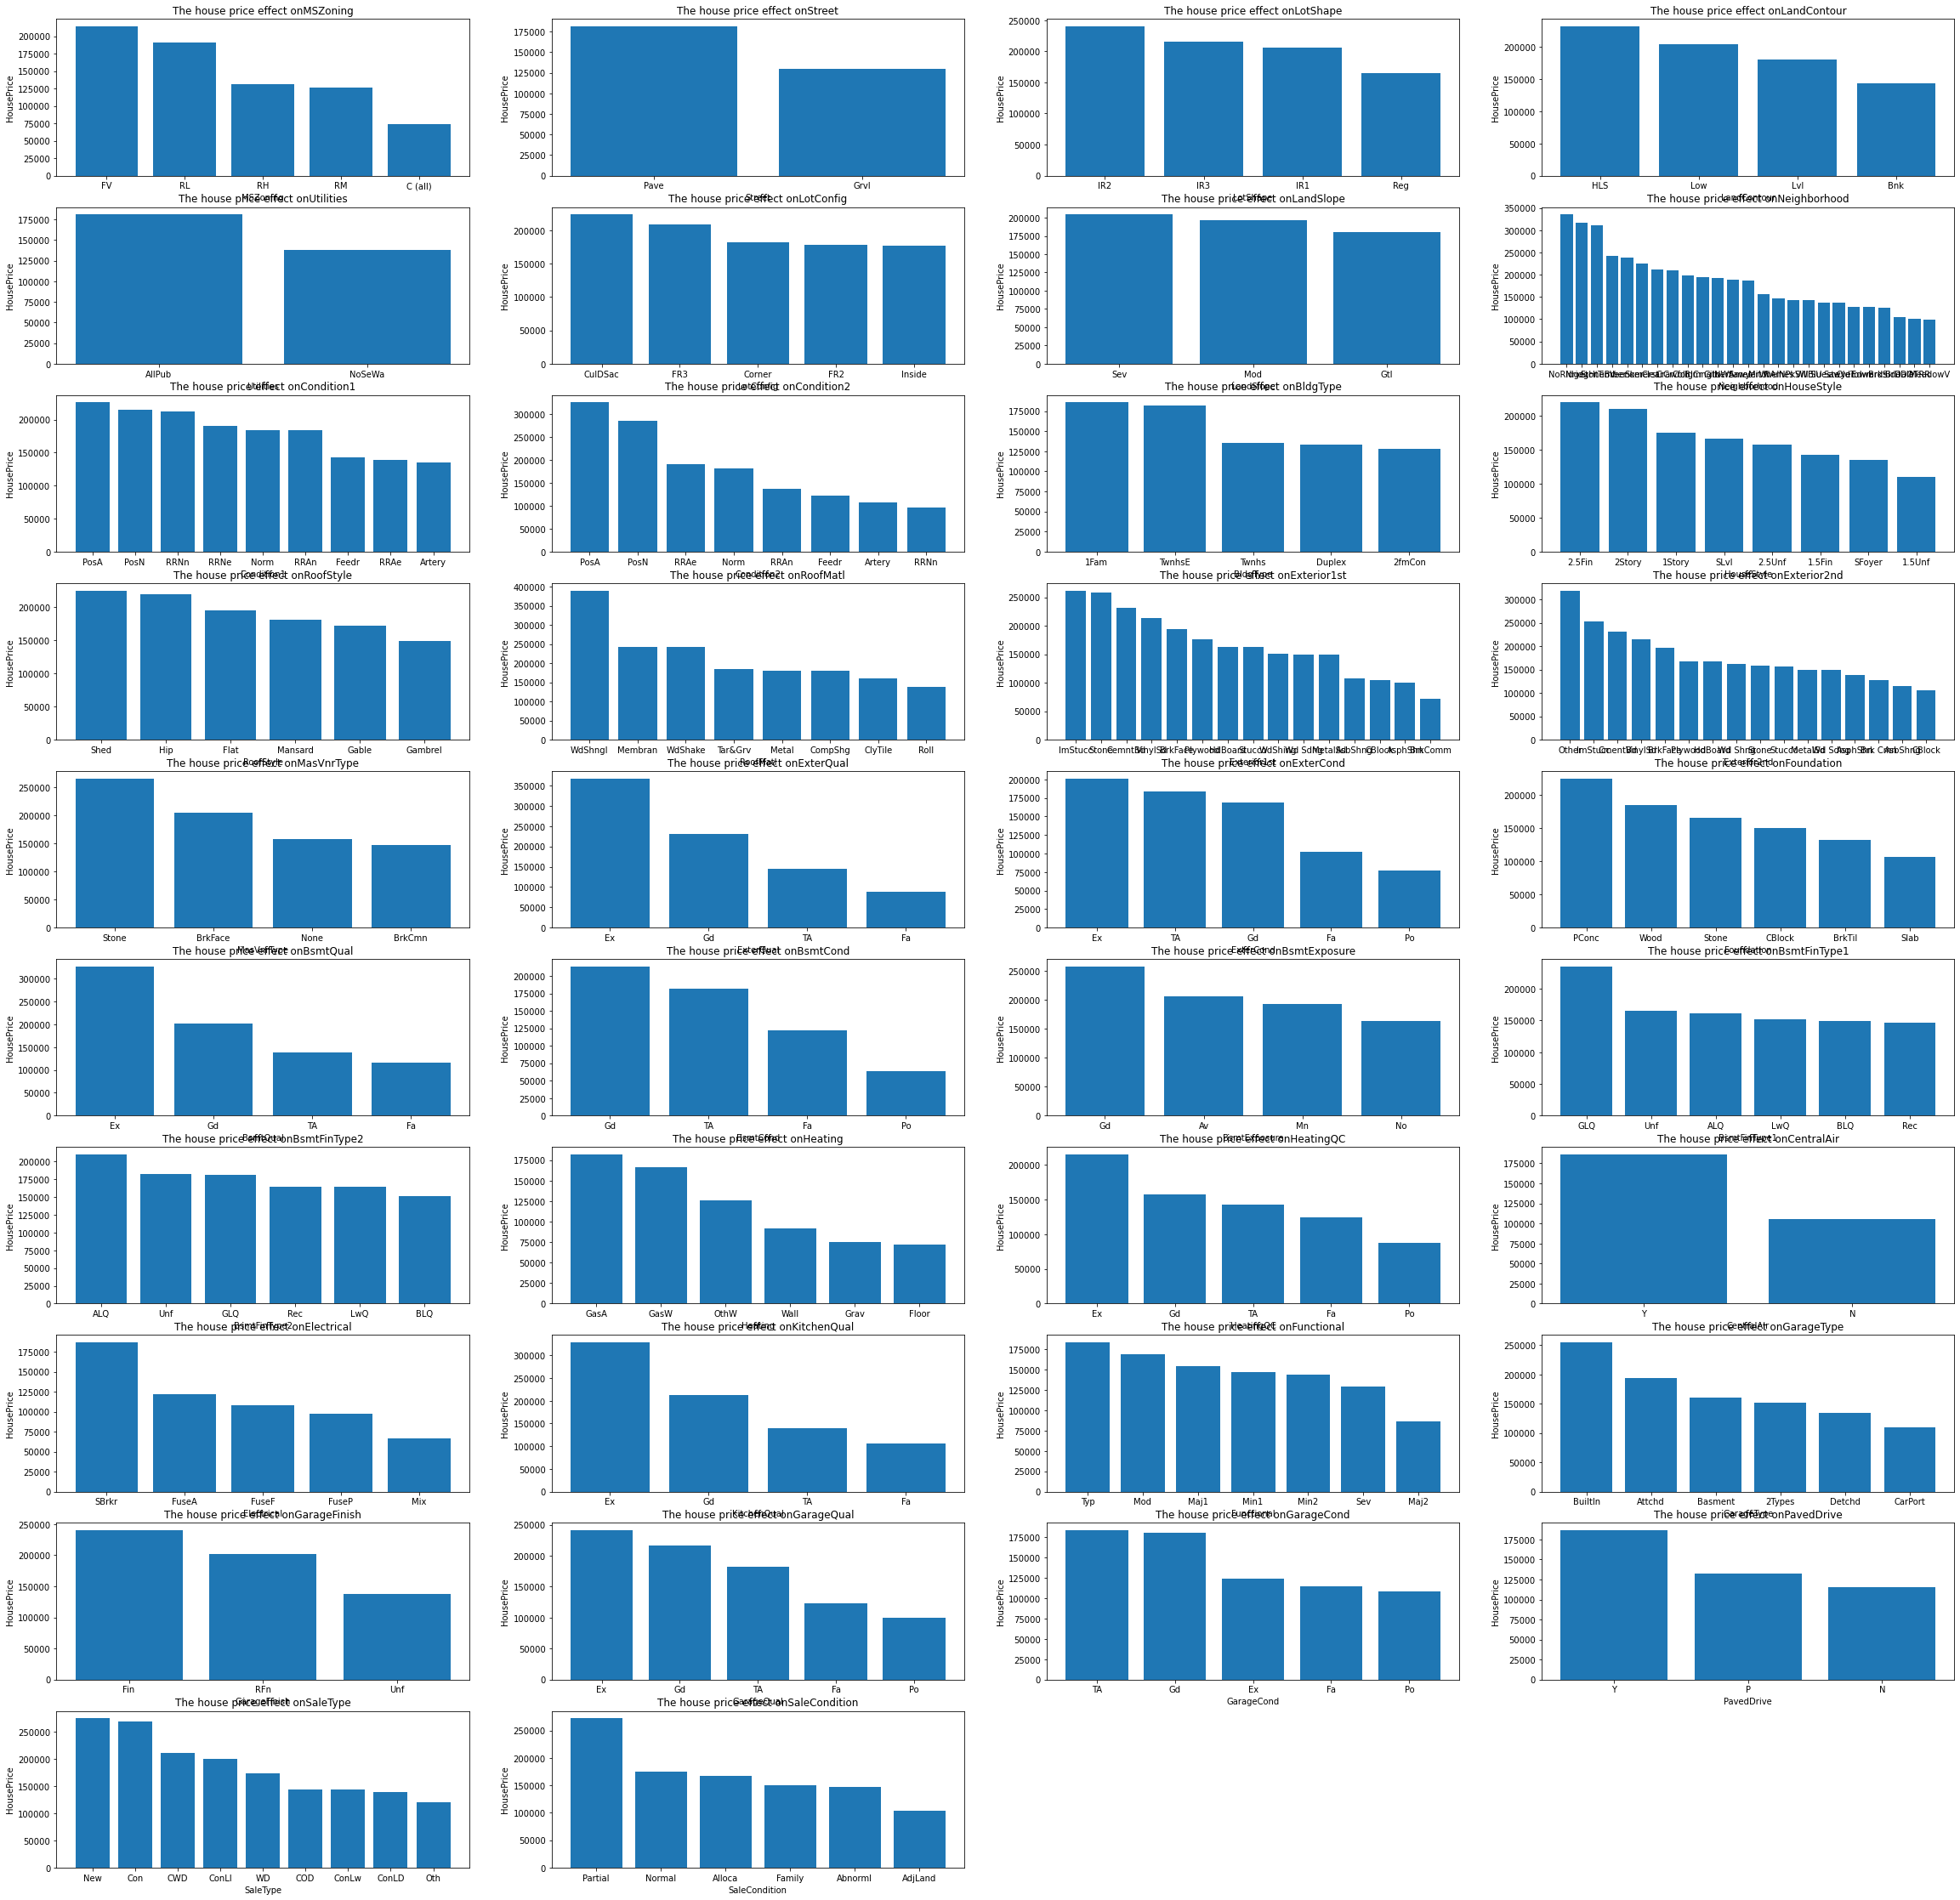

In [42]:
j=0
plt.figure(figsize=(40,40))
for column in objectColumns:
    plt.subplot(10,4,j+1)
    observationVal=train.groupby(column)['SalePrice'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
    observationValDF.reset_index(inplace=True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"The house price effect on{column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

#handling outliers

In [43]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [44]:
train.shape

(1460, 75)

In [45]:
train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [46]:
upper_lim=train['LotFrontage'].mean()+3*train['LotFrontage'].std()
lower_lim=train['LotFrontage'].mean()-3*train['LotFrontage'].std()

In [47]:
upper_lim

135.9467298969942

In [48]:
lower_lim

3.780667363279747

In [49]:
train[(train['LotFrontage'] <upper_lim) & (train['LotFrontage']>lower_lim)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [50]:
1460-1444

16

In [51]:
train.loc[(train['LotFrontage'] <upper_lim),'LotFrontage'] =upper_lim

In [52]:
train.loc[(train['LotFrontage'] <upper_lim),'LotFrontage'] 

Series([], Name: LotFrontage, dtype: float64)

In [53]:
for column in continuesCols:
    upper_lim=train[column].mean()+3*train[column].std()
    lower_lim=train[column].mean()-3*train[column].std()

    train.loc[(train[column] >upper_lim),column] =upper_lim
    train.loc[(train[column] <lower_lim),column] =lower_lim



In [54]:
lower_lim

-57406.31275824897

In [55]:
train[(train['LotFrontage'] <= upper_lim) & (train['LotFrontage'] >= lower_lim) ]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,135.94673,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,135.94673,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,135.94673,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,135.94673,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,135.94673,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,135.94673,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,8,2007,WD,Normal,175000.0
1456,20,RL,135.94673,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2010,WD,Normal,210000.0
1457,70,RL,135.94673,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,1531.858114,5,2010,WD,Normal,266500.0
1458,20,RL,135.94673,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112.000000,0,0.0,0,0.000000,4,2010,WD,Normal,142125.0


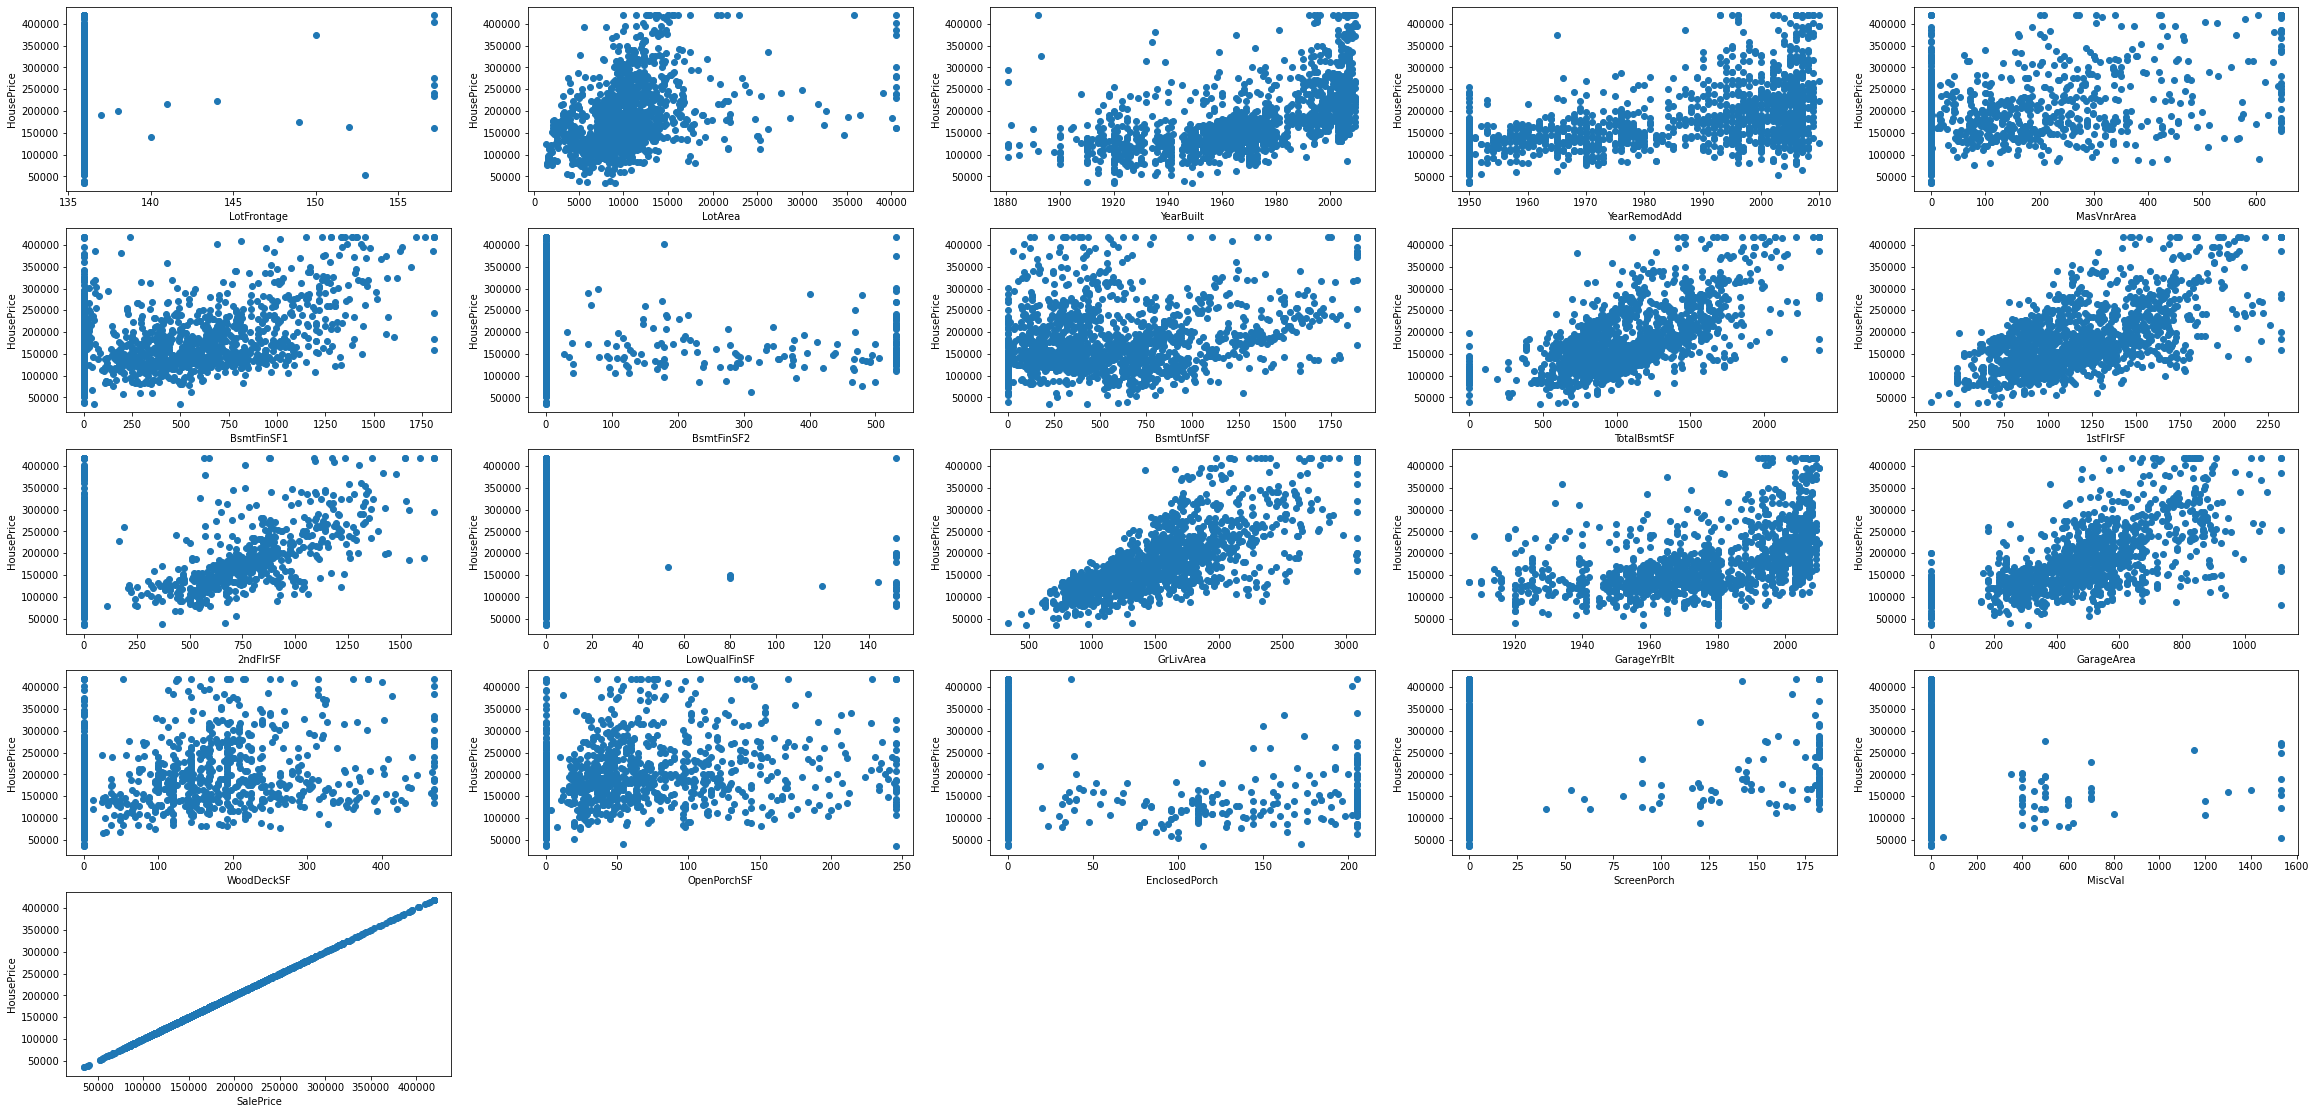

In [56]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [57]:
objectColumns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [58]:
MSZoningLE=LabelEncoder()
MSZoningLE.fit_transform(train["MSZoning"])
StreetLE=LabelEncoder()
StreetLE.fit_transform(train["Street"])

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,135.94673,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,135.94673,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,135.94673,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,135.94673,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,135.94673,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,135.94673,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,8,2007,WD,Normal,175000.0
1456,20,RL,135.94673,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2010,WD,Normal,210000.0
1457,70,RL,135.94673,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,1531.858114,5,2010,WD,Normal,266500.0
1458,20,RL,135.94673,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112.000000,0,0.0,0,0.000000,4,2010,WD,Normal,142125.0


In [60]:
trainObjectDF = train[objectColumns]

In [61]:
trainObjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [62]:
from collections import defaultdict
defaultEncoder= defaultdict(LabelEncoder)


# variable enconding
fittrainObjectDF= trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))


In [63]:
fittrainObjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [64]:
defaultEncoder['LotShape'].transform(["Reg"])

array([3])

In [65]:
#12/02/2022 video from 1.25 hr to continue

In [66]:
train.drop(objectColumns,axis=1,inplace=True)

In [67]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,135.94673,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.000000,0,0.0,0,0.0,2,2008,208500.0
1,20,135.94673,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.000000,0,0.0,0,0.0,5,2007,181500.0
2,60,135.94673,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.000000,0,0.0,0,0.0,9,2008,223500.0
3,70,135.94673,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,205.311555,0,0.0,0,0.0,2,2006,140000.0
4,60,135.94673,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.000000,0,0.0,0,0.0,12,2008,250000.0


In [68]:
updatedTrain = pd.concat([train,fittrainObjectDF],axis=1)

In [69]:
updatedTrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,135.94673,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,4,2,6,1,1,4,4,2,8,4
1,20,135.94673,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,4,3,6,1,1,4,4,2,8,4
2,60,135.94673,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,4,2,6,1,1,4,4,2,8,4
3,70,135.94673,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,4,2,6,5,2,4,4,2,8,0
4,60,135.94673,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,4,2,6,1,1,4,4,2,8,4


In [70]:
corrDF=updatedTrain.corr()

In [71]:
corrDF

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.021627,-0.279702,0.032628,-0.059316,0.027944,0.040581,0.020520,-0.073235,-0.066358,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.021627,1.000000,0.201753,0.085086,-0.030818,0.018691,0.040115,0.006295,0.082847,0.013422,...,0.001763,-0.091631,0.017843,-0.027066,-0.056126,0.020077,0.017319,-0.005100,0.006985,-0.035454
LotArea,-0.279702,0.201753,1.000000,0.181943,-0.015925,0.037913,0.038069,0.153834,0.239187,0.082894,...,0.059112,-0.114712,-0.044227,-0.175576,-0.168933,0.019339,0.038518,0.014115,0.001833,0.045476
OverallQual,0.032628,0.085086,0.181943,1.000000,-0.091932,0.573183,0.550684,0.416804,0.230085,-0.085303,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.030818,-0.015925,-0.091932,1.000000,-0.376205,0.073741,-0.131177,-0.044549,0.054472,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageQual,0.007630,0.020077,0.019339,0.090562,-0.094761,0.304135,0.130241,0.113714,0.127551,0.045400,...,0.109257,-0.014551,0.021339,-0.219632,-0.153777,1.000000,0.511375,0.167494,-0.029036,0.046204
GarageCond,0.002927,0.017319,0.038518,0.144988,-0.032236,0.246913,0.150579,0.071267,0.100624,-0.008157,...,0.119467,-0.068412,0.021204,-0.220106,-0.130269,0.511375,1.000000,0.187769,-0.016684,0.018784
PavedDrive,-0.059925,-0.005100,0.014115,0.229393,-0.062236,0.427485,0.168457,0.154841,0.197006,0.067335,...,0.213025,-0.050971,0.046994,-0.166480,-0.226045,0.167494,0.187769,1.000000,-0.039365,0.071233
SaleType,0.012464,0.006985,0.001833,-0.060472,0.095267,-0.052367,0.019647,-0.062240,0.012959,-0.029363,...,0.009257,0.038590,-0.008221,0.031879,0.047135,-0.029036,-0.016684,-0.039365,1.000000,0.184067


In [72]:
corrColumns=abs(corrDF['SalePrice']).sort_values(ascending=False)

In [73]:
len(corrColumns[corrColumns>0.4])

20

In [74]:
finalColumns=corrColumns[corrColumns>0.4].index

In [75]:
finalColumns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [76]:
corrColumns

SalePrice       1.000000
OverallQual     0.810469
GrLivArea       0.722471
GarageCars      0.663012
GarageArea      0.650517
                  ...   
BsmtHalfBath    0.026792
Utilities       0.015023
LandContour     0.014364
MasVnrType      0.011032
Condition2      0.008760
Name: SalePrice, Length: 75, dtype: float64

In [77]:
finalDF=updatedTrain[finalColumns]

In [78]:
finalDF.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [79]:
y=finalDF['SalePrice']

In [80]:
y.head()#depend

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [81]:
x=finalDF.drop(["SalePrice"],axis=1)

In [82]:
x.head()#independent

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [91]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
Df_minmax=pd.DataFrame(min_max.fit_transform(finalDF),columns=finalDF.columns)#columns=finalColumns
Df_minmax

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,0.451673,0.666667,0.498929,0.50,0.491747,0.360642,0.666667,0.262524,0.666667,0.666667,0.666667,0.5,0.945879,0.883333,0.500000,0.932303,0.000000,0.303729,0.0,0.4
1,0.381424,0.555556,0.336487,0.50,0.412780,0.531694,1.000000,0.466709,0.666667,1.000000,0.666667,0.5,0.737129,0.433333,0.333333,0.671186,0.333333,0.000000,0.0,0.2
2,0.490700,0.666667,0.526487,0.50,0.545588,0.387606,0.666667,0.294711,0.666667,0.666667,0.666667,0.5,0.930416,0.866667,0.333333,0.912961,0.333333,0.251042,0.0,0.4
3,0.273450,0.666667,0.501468,0.75,0.576098,0.318511,1.000000,0.315331,1.000000,0.666667,0.333333,1.0,0.265507,0.333333,0.416667,0.883948,0.333333,0.000000,0.5,0.0
4,0.559648,0.777778,0.675875,0.75,0.750183,0.482401,0.666667,0.407868,0.666667,0.666667,0.666667,0.5,0.922685,0.833333,0.583333,0.903290,0.333333,0.542374,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.364513,0.555556,0.476086,0.50,0.412780,0.401509,1.000000,0.311307,0.666667,1.000000,0.666667,0.5,0.914953,0.833333,0.416667,0.893619,0.333333,0.000000,0.0,0.4
1456,0.455576,0.555556,0.630551,0.50,0.448674,0.649661,1.000000,0.874577,0.666667,1.000000,0.666667,1.0,0.752592,0.633333,0.416667,0.690528,0.666667,0.184407,1.0,0.2
1457,0.602578,0.666667,0.727364,0.25,0.226132,0.485350,0.000000,0.429493,1.000000,0.666667,0.666667,0.5,0.466526,0.933333,0.583333,0.332702,0.666667,0.000000,0.0,0.8
1458,0.278978,0.444444,0.269770,0.25,0.215364,0.454173,1.000000,0.374172,1.000000,0.666667,0.333333,1.0,0.536110,0.766667,0.250000,0.419741,0.000000,0.000000,0.5,0.2
